Code needs some major simplification, but concept is complete

In [1]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
import matplotlib.cm as cm

data = pd.read_csv("labelled_newsc.csv", encoding='unicode_escape')
print(len(data))
data.head()

108774


topic                                               link          domain  \
0  SCIENCE  https://www.eurekalert.org/pub_releases/2020-0...  eurekalert.org   
1  SCIENCE  https://www.pulse.ng/news/world/an-irresistibl...        pulse.ng   
2  SCIENCE  https://www.express.co.uk/news/science/1322607...   express.co.uk   
3  SCIENCE  https://www.ndtv.com/world-news/glaciers-could...        ndtv.com   
4  SCIENCE  https://www.thesun.ie/tech/5742187/perseid-met...       thesun.ie   

    published_date                                              title lang  
0   8/6/2020 13:59  A closer look at water-splitting's solar fuel ...   en  
1  8/12/2020 15:14  An irresistible scent makes locusts swarm, stu...   en  
2  8/13/2020 21:01  Artificial intelligence warning: AI will know ...   en  
3   8/3/2020 22:18   Glaciers Could Have Sculpted Mars Valleys: Study   en  
4  8/12/2020 19:54  Perseid meteor shower 2020: What time and how ...   en

## Cleaning text
By removing trivial words and simplifying words to their root words.

In [2]:
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\melinadiaz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

In [4]:
data["title clean"]=data["title"].apply(clean)
data[["title","title clean"]].sample(10)

title  \
89009              Court orders restrain sale of Shoprite   
60750   MOST LIKED: Kareena Kapoor Khan's old vacay pi...   
74786   Magnificent In Montreal: Novak Djokovic's Firs...   
60711                Rate of infections in Victoria slows   
27007   Anushka Sharma gives a funny reply when asked ...   
57998   Calls for changes to Phase 3 following spike i...   
54695   Dubai, and by and by: What the press is saying...   
82594   Russell Crowe almost dumped from LA Confidenti...   
103661  No pressing need to set up S'wak-Kalimatan bor...   
32282   Nine charged as police find £40,000 in major d...   

                                              title clean  
89009                   court order restrain sale shoprit  
60750   like kareena kapoor khan old vacay pic samanth...  
74786   magnific montreal novak djokov first win roger...  
60711                           rate infect victoria slow  
27007             anushka sharma give funni repli ask kid  
57998                 call chang phase  follow spike case  
54695                             dubai press say august   
82594   russel crow almost dump la confidenti replac s...  
103661  press need set swakkalimatan border secur alig...  
32282   nine charg polic find £ major drug raid bolton...

In [9]:
data["topic"].unique()

array(['SCIENCE', 'TECHNOLOGY', 'HEALTH', 'WORLD', 'ENTERTAINMENT',
       'SPORTS', 'BUSINESS', 'NATION'], dtype=object)

In [10]:
tfidf = TfidfVectorizer(
    min_df = 5,
    max_df = 0.95,
    max_features = 8000,
    stop_words = 'english'
)
tfidf.fit(data["title"])
text = tfidf.transform(data["title"])

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters
Fit 22 clusters
Fit 24 clusters
Fit 26 clusters
Fit 28 clusters
Fit 30 clusters


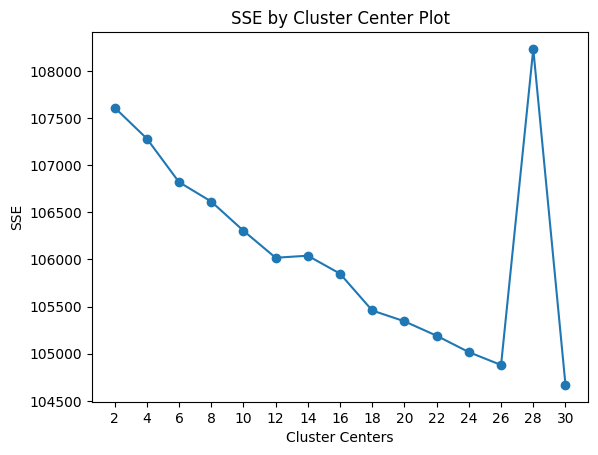

In [11]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(text, 30)

In [12]:
clusters = MiniBatchKMeans(n_clusters=12, init_size=1024, batch_size=2048, random_state=20).fit_predict(text)

C:\Users\melinadiaz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\melinadiaz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\melinadiaz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\melinadiaz\AppData\Local\Programs\Python\Python310\lib\si

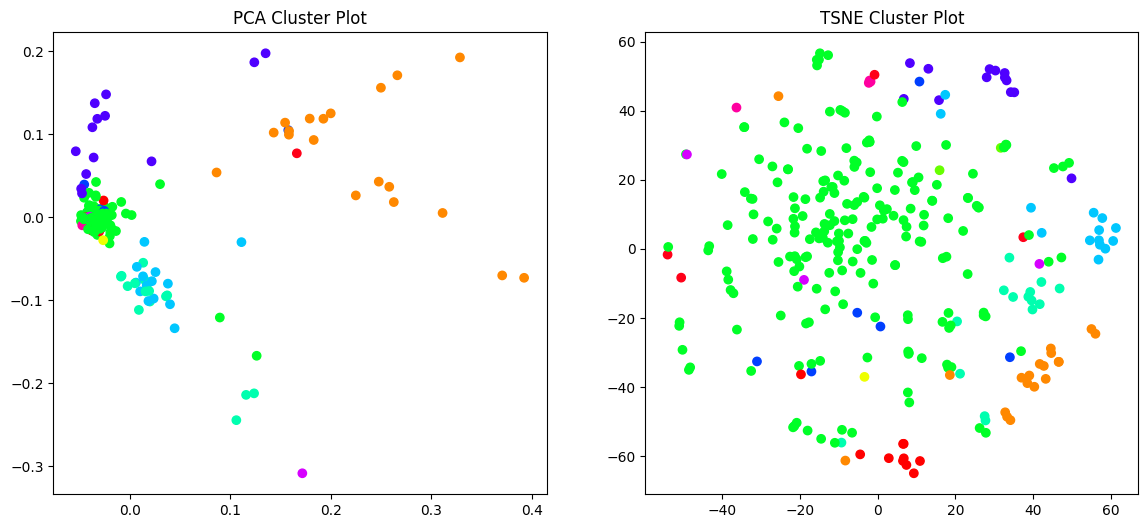

In [13]:
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=3000, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(text, clusters)

In [14]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(text, clusters, tfidf.get_feature_names(), 10)

C:\Users\melinadiaz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)



Cluster 0
health,vaccine,new,lebanon,coronavirus,trump,explosion,blast,beirut,says

Cluster 1
tests,test,study,positive,coronavirus,new,vaccine,cases,19,covid

Cluster 2
second,deaths,coronavirus,results,quarter,covid,19,new,cases,reports

Cluster 3
microsoft,new,000,ultra,2020,xiaomi,mi,august,windows,10

Cluster 4
video,season,year,google,day,virus,star,china,apple,trump

Cluster 5
pandemic,lockdown,live,positive,uk,deaths,new,vaccine,cases,coronavirus

Cluster 6
covid,features,apple,game,virus,video,york,cases,zealand,new

Cluster 7
england,19,don,virus,covid,beta,mental,want,public,health

Cluster 8
trends,2026,2025,industry,growth,forecast,analysis,global,market,2020

Cluster 9
india,virus,crash,covid,new,injured,coronavirus,shot,dead,hit

Cluster 10
buds,watch,ultra,transfer,live,20,note,samsung,galaxy,news

Cluster 11
spider,solskjaer,jadon,league,united,transfer,sancho,city,utd,man


In [62]:
df = pd.DataFrame(text.todense()).groupby(clusters).mean()

In [63]:
df

0         1         2         3         4         5         6     \
0  0.002498  0.001360  0.000000  0.001657  0.001770  0.000000  0.000849   
1  0.000532  0.004968  0.000000  0.003041  0.001881  0.001218  0.002441   
2  0.001637  0.000000  0.000000  0.000841  0.000000  0.000000  0.000947   
3  0.000000  0.000000  0.000000  0.000000  0.000000  0.001222  0.000000   
4  0.000000  0.003420  0.000000  0.002473  0.000000  0.000000  0.001449   
5  0.000000  0.000000  0.000000  0.000000  0.001053  0.002691  0.000000   
6  0.002109  0.001289  0.000807  0.000231  0.000476  0.000232  0.000128   
7  0.000000  0.000000  0.002904  0.000000  0.000000  0.001156  0.000000   
8  0.000000  0.000000  0.000936  0.000000  0.002022  0.000844  0.000000   
9  0.000000  0.002904  0.000000  0.000000  0.001193  0.000000  0.000000   

       7         8         9     ...      3439      3440      3441      3442  \
0  0.000000  0.000000  0.000000  ...  0.002361  0.002941  0.000000  0.000000   
1  0.000000  0.002436  0.000000  ...  0.021069  0.001229  0.002308  0.001217   
2  0.000000  0.000000  0.000000  ...  0.000000  0.048774  0.002961  0.000890   
3  0.000000  0.001291  0.000000  ...  0.007397  0.000629  0.000000  0.000000   
4  0.001434  0.000000  0.000000  ...  0.001241  0.004992  0.001389  0.000000   
5  0.000000  0.000000  0.000000  ...  0.002108  0.005106  0.000000  0.000000   
6  0.000492  0.000686  0.000524  ...  0.000000  0.000000  0.000744  0.001203   
7  0.000000  0.002199  0.000000  ...  0.000000  0.003439  0.002432  0.000000   
8  0.000000  0.000000  0.000000  ...  0.001441  0.008228  0.003759  0.000000   
9  0.000000  0.000000  0.000000  ...  0.003124  0.178128  0.000000  0.000957   

       3443      3444      3445      3446      3447      3448  
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000983  
1  0.000000  0.000000  0.000712  0.001474  0.000567  0.000000  
2  0.000000  0.000000  0.000938  0.000000  0.001702  0.000000  
3  0.000000  0.000000  0.001232  0.000000  0.000000  0.000000  
4  0.001511  0.000000  0.000000  0.000000  0.000000  0.001493  
5  0.000000  0.000000  0.001188  0.000000  0.000000  0.000000  
6  0.000385  0.000623  0.000447  0.000259  0.001196  0.000381  
7  0.001321  0.000000  0.000000  0.000000  0.000000  0.000000  
8  0.000000  0.000000  0.000950  0.001176  0.000000  0.000000  
9  0.000000  0.000000  0.000979  0.000000  0.000000  0.001026  

[10 rows x 3449 columns]

In [15]:
data

topic                                               link  \
0             SCIENCE  https://www.eurekalert.org/pub_releases/2020-0...   
1             SCIENCE  https://www.pulse.ng/news/world/an-irresistibl...   
2             SCIENCE  https://www.express.co.uk/news/science/1322607...   
3             SCIENCE  https://www.ndtv.com/world-news/glaciers-could...   
4             SCIENCE  https://www.thesun.ie/tech/5742187/perseid-met...   
...               ...                                                ...   
108769         NATION  https://www.vanguardngr.com/2020/08/pdp-govern...   
108770       BUSINESS  https://www.patentlyapple.com/patently-apple/2...   
108771         HEALTH  https://www.belfastlive.co.uk/news/health/coro...   
108772  ENTERTAINMENT  https://www.thenews.com.pk/latest/696364-paul-...   
108773         SPORTS  https://www.balls.ie/football/shane-duffy-brig...   

                   domain   published_date  \
0          eurekalert.org   8/6/2020 13:59   
1                pulse.ng  8/12/2020 15:14   
2           express.co.uk  8/13/2020 21:01   
3                ndtv.com   8/3/2020 22:18   
4               thesun.ie  8/12/2020 19:54   
...                   ...              ...   
108769    vanguardngr.com    8/8/2020 2:40   
108770  patentlyapple.com    8/8/2020 1:27   
108771  belfastlive.co.uk  8/12/2020 17:01   
108772     thenews.com.pk    8/5/2020 4:59   
108773           balls.ie   8/9/2020 10:25   

                                                    title lang  \
0       A closer look at water-splitting's solar fuel ...   en   
1       An irresistible scent makes locusts swarm, stu...   en   
2       Artificial intelligence warning: AI will know ...   en   
3        Glaciers Could Have Sculpted Mars Valleys: Study   en   
4       Perseid meteor shower 2020: What time and how ...   en   
...                                                   ...  ...   
108769  PDP governors forum urges security agencies t...   en   
108770  In Q2-20, Apple Dominated the Premium Smartpho...   en   
108771  Coronavirus Northern Ireland: Full breakdown s...   en   
108772  Paul McCartney details post-Beatles distress a...   en   
108773  Report: Talks Underway To Keep Shane Duffy In ...   en   

                                              title clean  
0               closer look watersplit solar fuel potenti  
1             irresist scent make locust swarm studi find  
2           artifici intellig warn ai know us better know  
3                   glacier could sculpt mar valley studi  
4       perseid meteor shower  time see huge bright fi...  
...                                                   ...  
108769  pdp governors forum urg secur agenc restrateg...  
108770   appl domin premium smartphon segment india pl...  
108771  coronavirus northern ireland full breakdown sh...  
108772  paul mccartney detail postbeatl distress blame...  
108773  report talk underway keep shane duffi premier ...  

[108774 rows x 7 columns]

In [36]:
newdata = data["topic"]+" "+data["title clean"]
newdata.head()

0    SCIENCE closer look watersplit solar fuel potenti
1    SCIENCE irresist scent make locust swarm studi...
2    SCIENCE artifici intellig warn ai know us bett...
3        SCIENCE glacier could sculpt mar valley studi
4    SCIENCE perseid meteor shower  time see huge b...
dtype: object

In [22]:
tfidf = TfidfVectorizer(
    min_df = 5,
    max_df = 0.95,
    max_features = 8000,
    stop_words = 'english'
)
tfidf.fit(newdata)
text = tfidf.transform(newdata)

In [23]:
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=3000, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(text, clusters)

<108774x8000 sparse matrix of type '<class 'numpy.float64'>'
	with 868757 stored elements in Compressed Sparse Row format>

In [25]:
tfidf.get_feature_names_out()

array(['00', '000', '007', ..., 'zte', 'zuma', 'zydus'], dtype=object)

In [38]:
text.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from collections import defaultdict

# Assuming articles is a list of tuples (article_text, label)
# Assuming word_vectors is a dictionary {word: [frequencies across all articles]}

# Step 1: Calculate average frequency of each word
word_avg_freq = {word: np.mean(frequencies) for word, frequencies in word_vectors.items()}

# Step 2: Prepare data for PCA
words = list(word_avg_freq.keys())
avg_frequencies = np.array(list(word_avg_freq.values())).reshape(-1, 1)

# Perform PCA to reduce to 2D
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(avg_frequencies)

# Step 3: Plot the 2D scatter plot
plt.figure(figsize=(10, 7))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1])

# Annotate the scatter plot with words
for i, word in enumerate(words):
    plt.annotate(word, (reduced_data[i, 0], reduced_data[i, 1]))

plt.title('2D Scatter Plot of Word Frequencies')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid()

ValueError: n_components=2 must be between 0 and min(n_samples, n_features)=1 with svd_solver='full'

In [64]:
from sklearn.feature_extraction.text import CountVectorizer

counter = CountVectorizer(min_df = 10)
counterx = counter.fit_transform(newdata)

words=counter.get_feature_names_out()
counterx.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [54]:
word_vectors = dict(zip(counter.get_feature_names_out(), counterx.todense()))
word_avg_freq = {word: np.mean(frequencies) for word, frequencies in word_vectors.items()}
avg_frequencies = np.array(list(word_avg_freq.values())).reshape(-1, 1)

In [60]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(avg_frequencies)

ValueError: n_components=2 must be between 0 and min(n_samples, n_features)=1 with svd_solver='full'

IndexError: index 1 is out of bounds for axis 1 with size 1

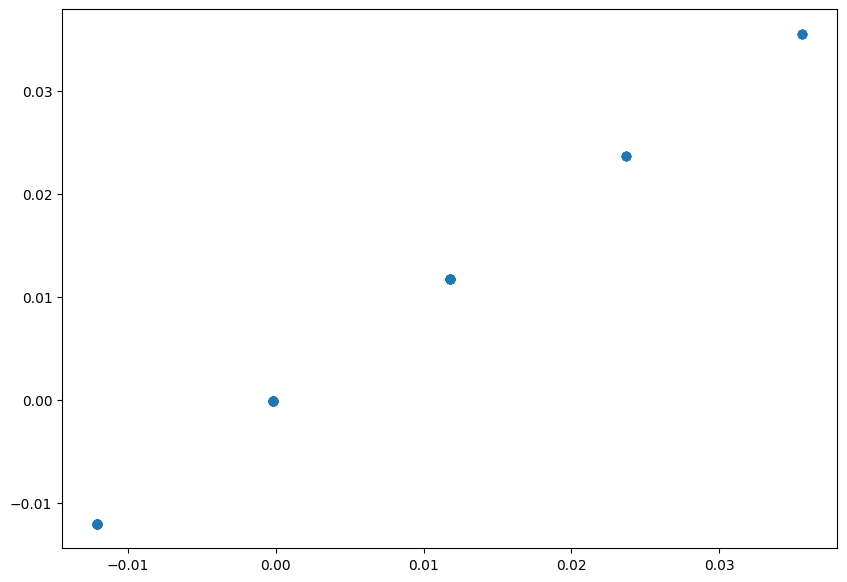

In [51]:
plt.figure(figsize=(10, 7))
plt.scatter(reduced_data[:, 0], reduced_data)

# Annotate the scatter plot with words
for i, word in enumerate(words):
    plt.annotate(word, (reduced_data[i, 0], reduced_data[i, 1]))

plt.title('2D Scatter Plot of Word Frequencies')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

In [58]:
avg_frequencies

array([[0.0006914 ],
       [0.00080664],
       [0.00103711],
       ...,
       [0.00115234],
       [0.0006914 ],
       [0.0003457 ]])

In [61]:
data

topic                                               link  \
0             SCIENCE  https://www.eurekalert.org/pub_releases/2020-0...   
1             SCIENCE  https://www.pulse.ng/news/world/an-irresistibl...   
2             SCIENCE  https://www.express.co.uk/news/science/1322607...   
3             SCIENCE  https://www.ndtv.com/world-news/glaciers-could...   
4             SCIENCE  https://www.thesun.ie/tech/5742187/perseid-met...   
...               ...                                                ...   
108769         NATION  https://www.vanguardngr.com/2020/08/pdp-govern...   
108770       BUSINESS  https://www.patentlyapple.com/patently-apple/2...   
108771         HEALTH  https://www.belfastlive.co.uk/news/health/coro...   
108772  ENTERTAINMENT  https://www.thenews.com.pk/latest/696364-paul-...   
108773         SPORTS  https://www.balls.ie/football/shane-duffy-brig...   

                   domain   published_date  \
0          eurekalert.org   8/6/2020 13:59   
1                pulse.ng  8/12/2020 15:14   
2           express.co.uk  8/13/2020 21:01   
3                ndtv.com   8/3/2020 22:18   
4               thesun.ie  8/12/2020 19:54   
...                   ...              ...   
108769    vanguardngr.com    8/8/2020 2:40   
108770  patentlyapple.com    8/8/2020 1:27   
108771  belfastlive.co.uk  8/12/2020 17:01   
108772     thenews.com.pk    8/5/2020 4:59   
108773           balls.ie   8/9/2020 10:25   

                                                    title lang  \
0       A closer look at water-splitting's solar fuel ...   en   
1       An irresistible scent makes locusts swarm, stu...   en   
2       Artificial intelligence warning: AI will know ...   en   
3        Glaciers Could Have Sculpted Mars Valleys: Study   en   
4       Perseid meteor shower 2020: What time and how ...   en   
...                                                   ...  ...   
108769  PDP governors forum urges security agencies t...   en   
108770  In Q2-20, Apple Dominated the Premium Smartpho...   en   
108771  Coronavirus Northern Ireland: Full breakdown s...   en   
108772  Paul McCartney details post-Beatles distress a...   en   
108773  Report: Talks Underway To Keep Shane Duffy In ...   en   

                                              title clean  
0               closer look watersplit solar fuel potenti  
1             irresist scent make locust swarm studi find  
2           artifici intellig warn ai know us better know  
3                   glacier could sculpt mar valley studi  
4       perseid meteor shower  time see huge bright fi...  
...                                                   ...  
108769  pdp governors forum urg secur agenc restrateg...  
108770   appl domin premium smartphon segment india pl...  
108771  coronavirus northern ireland full breakdown sh...  
108772  paul mccartney detail postbeatl distress blame...  
108773  report talk underway keep shane duffi premier ...  

[108774 rows x 7 columns]

In [63]:
data.topic.unique()

array(['SCIENCE', 'TECHNOLOGY', 'HEALTH', 'WORLD', 'ENTERTAINMENT',
       'SPORTS', 'BUSINESS', 'NATION'], dtype=object)

In [74]:
df=pd.DataFrame()


ValueError: Iterable over raw text documents expected, string object received.

In [ ]:
science=dict(zip(counter.get_feature_names_out(), counterx.todense()))

In [73]:
text.join()


AttributeError: 'Series' object has no attribute 'join'

In [75]:
words

array(['aa', 'aamir', 'aap', ..., 'zuckerberg', 'zuma', 'zydus'],
      dtype=object)

In [90]:
all=" ".join(data["title clean"])
words=set(all.split(" "))
len(words)

50623

In [93]:
df=pd.DataFrame()

In [92]:
words

{'',
 'tgx',
 'transship',
 'saintjoseph',
 '\x93mature\x94',
 '\x91this',
 'horvat',
 'onesid',
 'palaszczuk\x92',
 'pandemichit',
 'afterlif',
 'indianapoli',
 'howler',
 'clanci',
 'cancel',
 'kutuni',
 'tenselook',
 'tjx',
 'wasteaurubi',
 'thrones\x92',
 'unifil',
 'polltaiwan',
 'bred',
 'samuel',
 'handcuf',
 'sullair',
 'guff',
 'microinvest',
 'pritzker',
 'goahead',
 'prochancellor',
 'ethanol',
 'secreci',
 'telecommut',
 'nuvia',
 '\x91aaay',
 'coffi',
 'studygener',
 'millionyearold',
 'roadm',
 'kemar',
 'te',
 '\x93spruce',
 'swarna',
 'pinnacl',
 '\x91relat',
 'dni',
 'chinesepremierleagu',
 'sanjiv',
 'pileup',
 '\x91make\x92',
 'tiandi',
 'lookbook',
 'covidneg',
 'dld',
 'alshabab',
 'sindh',
 'pallotta',
 '\x93alice\x94',
 'wiretap',
 'scoresheet',
 '\x91quarantin',
 'livein',
 'immigr',
 'autonew',
 'topsel',
 'immatur',
 'subbi',
 'securityasaservic',
 'costello',
 'fraca',
 'witherden',
 'coronavirusstricken',
 'baker',
 'sprinkl',
 '\x91endang',
 'quantifi',
 'c

In [5]:
p=[]


for j in data.topic.unique():
    text=' '.join(data[data["topic"]==j]["title clean"]).split(" ") 
    d={}
    for k in text:
        if k not in d.keys():
            d[k]=1
        else:
            d[k]+=1
            
    p.append(d)

In [6]:
p

[{'closer': 17,
  'look': 53,
  'watersplit': 2,
  'solar': 70,
  'fuel': 21,
  'potenti': 15,
  'irresist': 5,
  'scent': 10,
  'make': 107,
  'locust': 13,
  'swarm': 11,
  'studi': 259,
  'find': 157,
  'artifici': 11,
  'intellig': 10,
  'warn': 26,
  'ai': 11,
  'know': 38,
  'us': 48,
  'better': 7,
  'glacier': 41,
  'could': 149,
  'sculpt': 12,
  'mar': 333,
  'valley': 24,
  'perseid': 166,
  'meteor': 205,
  'shower': 188,
  '': 1008,
  'time': 103,
  'see': 80,
  'huge': 21,
  'bright': 30,
  'firebal': 13,
  'uk': 22,
  'tonight': 38,
  'nasa': 524,
  'releas': 16,
  'indepth': 2,
  'map': 28,
  'beirut': 35,
  'explos': 27,
  'damag': 48,
  'spacex': 284,
  'rocket': 87,
  'launch': 113,
  'set': 30,
  'saturday': 6,
  'watch': 96,
  'orbit': 64,
  'space': 220,
  'tourism': 1,
  'rebirth': 1,
  'greenland': 51,
  'melt': 39,
  'ice': 115,
  'sheet': 36,
  'pass': 32,
  'point': 33,
  'return': 78,
  'invit': 4,
  'engin': 15,
  'student': 14,
  'help': 58,
  'harvest': 7

In [7]:
df0=pd.DataFrame(p[0].items())
df0=df0.rename(columns={1:data.topic.unique()[0]})
df0.head()


0  SCIENCE
0      closer       17
1        look       53
2  watersplit        2
3       solar       70
4        fuel       21

In [8]:
df1=pd.DataFrame(p[1].items())
df1=df1.rename(columns={1:data.topic.unique()[1]})
df1.head()

0  TECHNOLOGY
0  come         401
1   see          75
2   it          52
3  like         161
4  play         292

In [9]:
df2=pd.DataFrame(p[2].items())
df2=df2.rename(columns={1:data.topic.unique()[2]})
df2.head()

0  HEALTH
0        wa      14
1     delay     114
2       eas      42
3     virus     940
4  restrict     122

In [10]:
df3=pd.DataFrame(p[3].items())
df3=df3.rename(columns={1:data.topic.unique()[3]})
df3.head()

0  WORLD
0             7077
1    travel    249
2  restrict    110
3    devast     47
4    africa    415

In [11]:
df4=pd.DataFrame(p[4].items())
df4=df4.rename(columns={1:data.topic.unique()[4]})
df4.head()

0  ENTERTAINMENT
0     mark             66
1   wright              6
2      say            617
3  anxieti              6
4   famili            258

In [12]:
df5=pd.DataFrame(p[5].items())
df5=df5.rename(columns={1:data.topic.unique()[5]})
df5.head()

0  SPORTS
0  bafana      12
1  intern      49
2     tau      10
3   score     195
4   debut      63

In [13]:
df6=pd.DataFrame(p[6].items())
df6=df6.rename(columns={1:data.topic.unique()[6]})
df6.head()

0  BUSINESS
0    iphon        25
1              13067
2    anoth        65
3    defin         4
4  chapter         6

In [14]:
df7=pd.DataFrame(p[7].items())
df7=df7.rename(columns={1:data.topic.unique()[7]})
df7.head()

0  NATION
0      stop     109
1  outbreak      84
2       new     921
3      area      74
4     centr     117

In [15]:
df0=df0.merge(df1,how="outer",on=0)
df0.head()

0  SCIENCE  TECHNOLOGY
0      closer     17.0        19.0
1        look     53.0       209.0
2  watersplit      2.0         NaN
3       solar     70.0         6.0
4        fuel     21.0        12.0

In [16]:
df0=df0.merge(df2,how="outer",on=0)
df0.head()

0  SCIENCE  TECHNOLOGY  HEALTH
0      closer     17.0        19.0     9.0
1        look     53.0       209.0    68.0
2  watersplit      2.0         NaN     NaN
3       solar     70.0         6.0     1.0
4        fuel     21.0        12.0    20.0

In [17]:
df0=df0.merge(df3,how="outer",on=0)
df0.head()

0  SCIENCE  TECHNOLOGY  HEALTH  WORLD
0      closer     17.0        19.0     9.0   11.0
1        look     53.0       209.0    68.0   68.0
2  watersplit      2.0         NaN     NaN    NaN
3       solar     70.0         6.0     1.0    NaN
4        fuel     21.0        12.0    20.0   58.0

In [18]:
df0=df0.merge(df4,how="outer",on=0)
df0.head()

0  SCIENCE  TECHNOLOGY  HEALTH  WORLD  ENTERTAINMENT
0      closer     17.0        19.0     9.0   11.0            4.0
1        look     53.0       209.0    68.0   68.0          273.0
2  watersplit      2.0         NaN     NaN    NaN            NaN
3       solar     70.0         6.0     1.0    NaN            1.0
4        fuel     21.0        12.0    20.0   58.0            6.0

In [19]:
df0=df0.merge(df5,how="outer",on=0)
df0.head()

0  SCIENCE  TECHNOLOGY  HEALTH  WORLD  ENTERTAINMENT  SPORTS
0      closer     17.0        19.0     9.0   11.0            4.0    26.0
1        look     53.0       209.0    68.0   68.0          273.0   156.0
2  watersplit      2.0         NaN     NaN    NaN            NaN     NaN
3       solar     70.0         6.0     1.0    NaN            1.0     NaN
4        fuel     21.0        12.0    20.0   58.0            6.0     9.0

In [20]:
df0=df0.merge(df6,how="outer",on=0)
df0.head()

0  SCIENCE  TECHNOLOGY  HEALTH  WORLD  ENTERTAINMENT  SPORTS  \
0      closer     17.0        19.0     9.0   11.0            4.0    26.0   
1        look     53.0       209.0    68.0   68.0          273.0   156.0   
2  watersplit      2.0         NaN     NaN    NaN            NaN     NaN   
3       solar     70.0         6.0     1.0    NaN            1.0     NaN   
4        fuel     21.0        12.0    20.0   58.0            6.0     9.0   

   BUSINESS  
0      15.0  
1     105.0  
2       NaN  
3      49.0  
4      85.0

In [21]:
df0=df0.merge(df7,how="outer",on=0)
df0.head()

0  SCIENCE  TECHNOLOGY  HEALTH  WORLD  ENTERTAINMENT  SPORTS  \
0      closer     17.0        19.0     9.0   11.0            4.0    26.0   
1        look     53.0       209.0    68.0   68.0          273.0   156.0   
2  watersplit      2.0         NaN     NaN    NaN            NaN     NaN   
3       solar     70.0         6.0     1.0    NaN            1.0     NaN   
4        fuel     21.0        12.0    20.0   58.0            6.0     9.0   

   BUSINESS  NATION  
0      15.0     8.0  
1     105.0    57.0  
2       NaN     NaN  
3      49.0     1.0  
4      85.0    21.0

In [22]:
df0

0  SCIENCE  TECHNOLOGY  HEALTH  WORLD  ENTERTAINMENT  SPORTS  \
0           closer     17.0        19.0     9.0   11.0            4.0    26.0   
1             look     53.0       209.0    68.0   68.0          273.0   156.0   
2       watersplit      2.0         NaN     NaN    NaN            NaN     NaN   
3            solar     70.0         6.0     1.0    NaN            1.0     NaN   
4             fuel     21.0        12.0    20.0   58.0            6.0     9.0   
...            ...      ...         ...     ...    ...            ...     ...   
50618        ngumi      NaN         NaN     NaN    NaN            NaN     NaN   
50619         icdc      NaN         NaN     NaN    NaN            NaN     NaN   
50620      achieng      NaN         NaN     NaN    NaN            NaN     NaN   
50621    survivor      NaN         NaN     NaN    NaN            NaN     NaN   
50622  restrategis      NaN         NaN     NaN    NaN            NaN     NaN   

       BUSINESS  NATION  
0          15.0     8.0  
1         105.0    57.0  
2           NaN     NaN  
3          49.0     1.0  
4          85.0    21.0  
...         ...     ...  
50618       NaN     1.0  
50619       NaN     1.0  
50620       NaN     1.0  
50621       NaN     1.0  
50622       NaN     1.0  

[50623 rows x 9 columns]

In [23]:
df0.fillna(0, inplace=True)
df0

0  SCIENCE  TECHNOLOGY  HEALTH  WORLD  ENTERTAINMENT  SPORTS  \
0           closer     17.0        19.0     9.0   11.0            4.0    26.0   
1             look     53.0       209.0    68.0   68.0          273.0   156.0   
2       watersplit      2.0         0.0     0.0    0.0            0.0     0.0   
3            solar     70.0         6.0     1.0    0.0            1.0     0.0   
4             fuel     21.0        12.0    20.0   58.0            6.0     9.0   
...            ...      ...         ...     ...    ...            ...     ...   
50618        ngumi      0.0         0.0     0.0    0.0            0.0     0.0   
50619         icdc      0.0         0.0     0.0    0.0            0.0     0.0   
50620      achieng      0.0         0.0     0.0    0.0            0.0     0.0   
50621    survivor      0.0         0.0     0.0    0.0            0.0     0.0   
50622  restrategis      0.0         0.0     0.0    0.0            0.0     0.0   

       BUSINESS  NATION  
0          15.0     8.0  
1         105.0    57.0  
2           0.0     0.0  
3          49.0     1.0  
4          85.0    21.0  
...         ...     ...  
50618       0.0     1.0  
50619       0.0     1.0  
50620       0.0     1.0  
50621       0.0     1.0  
50622       0.0     1.0  

[50623 rows x 9 columns]

In [106]:
df0["totals"]=df0["SCIENCE"]+df0["TECHNOLOGY"]+df0["HEALTH"]+df0["ENTERTAINMENT"]+df0["SPORTS"]+df0["BUSINESS"]+df0["NATION"]
df0

C:\Users\melinadiaz\AppData\Local\Temp\ipykernel_38432\923043054.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0  SCIENCE  TECHNOLOGY  HEALTH  WORLD  ENTERTAINMENT  SPORTS  \
0         closer     17.0        19.0     9.0   11.0            4.0    26.0   
1           look     53.0       209.0    68.0   68.0          273.0   156.0   
3          solar     70.0         6.0     1.0    0.0            1.0     0.0   
4           fuel     21.0        12.0    20.0   58.0            6.0     9.0   
5        potenti     15.0        34.0   150.0   35.0            9.0    41.0   
...          ...      ...         ...     ...    ...            ...     ...   
47648     balala      0.0         0.0     0.0    0.0            0.0     0.0   
47758    makhura      0.0         0.0     0.0    0.0            0.0     0.0   
47993     ambrin      0.0         0.0     0.0    0.0            0.0     0.0   
48507  okahandja      0.0         0.0     0.0    0.0            0.0     0.0   
48668    harapan      0.0         0.0     0.0    0.0            0.0     0.0   

       BUSINESS  NATION  totals  
0          15.0     8.0    98.0  
1         105.0    57.0   921.0  
3          49.0     1.0   128.0  
4          85.0    21.0   174.0  
5         105.0    33.0   387.0  
...         ...     ...     ...  
47648       0.0     6.0     6.0  
47758       0.0    10.0    10.0  
47993       0.0     8.0     8.0  
48507       0.0     6.0     6.0  
48668       0.0     6.0     6.0  

[11320 rows x 10 columns]

In [172]:
df0=df0[df0["totals"]>10]

In [173]:
df0test=df0
df0test

0  SCIENCE  TECHNOLOGY  HEALTH  WORLD  ENTERTAINMENT  SPORTS  \
0          closer     17.0        19.0     9.0   11.0            4.0    26.0   
1            look     53.0       209.0    68.0   68.0          273.0   156.0   
3           solar     70.0         6.0     1.0    0.0            1.0     0.0   
4            fuel     21.0        12.0    20.0   58.0            6.0     9.0   
5         potenti     15.0        34.0   150.0   35.0            9.0    41.0   
...           ...      ...         ...     ...    ...            ...     ...   
46516        jamb      0.0         0.0     0.0    0.0            0.0     0.0   
46531  curriculum      0.0         0.0     0.0    0.0            0.0     0.0   
46674        sslc      0.0         0.0     0.0    0.0            0.0     0.0   
46784        mlas      0.0         0.0     0.0    0.0            0.0     0.0   
47561       defil      0.0         0.0     0.0    0.0            0.0     0.0   

       BUSINESS  NATION  totals  
0          15.0     8.0    98.0  
1         105.0    57.0   921.0  
3          49.0     1.0   128.0  
4          85.0    21.0   174.0  
5         105.0    33.0   387.0  
...         ...     ...     ...  
46516       0.0    12.0    12.0  
46531       0.0    13.0    13.0  
46674       0.0    11.0    11.0  
46784       0.0    13.0    13.0  
47561       0.0    11.0    11.0  

[7610 rows x 10 columns]

In [117]:
(17**2)+19**2+9**2+11**2+4**2+26**2+15**2+8**2

1833

In [63]:
17/np.sqrt(1833)

0.39707056048699396

In [174]:
df0testnorm=df0test.copy()
for j in data.topic.unique():
    df0testnorm[j]=df0test[j]/np.sqrt(df0test[data.topic.unique()[0]]**2+df0test[data.topic.unique()[1]]**2+df0test[data.topic.unique()[2]]**2+df0test[data.topic.unique()[3]]**2+df0test[data.topic.unique()[4]]**2+df0test[data.topic.unique()[5]]**2+df0test[data.topic.unique()[6]]**2+df0test[data.topic.unique()[7]]**2)
print(df0testnorm["totals"].min(),df0testnorm["totals"].max())
df0testnorm["totals"]=df0testnorm["totals"]**(1/3)
df0testnorm

11.0 54715.0


0   SCIENCE  TECHNOLOGY    HEALTH     WORLD  ENTERTAINMENT  \
0          closer  0.397071    0.443785  0.210214  0.256928       0.093428   
1            look  0.128971    0.508582  0.165472  0.165472       0.664320   
3           solar  0.817053    0.070033  0.011672  0.000000       0.011672   
4            fuel  0.190657    0.108947  0.181578  0.526577       0.054473   
5         potenti  0.075973    0.172205  0.759730  0.177270       0.045584   
...           ...       ...         ...       ...       ...            ...   
46516        jamb  0.000000    0.000000  0.000000  0.000000       0.000000   
46531  curriculum  0.000000    0.000000  0.000000  0.000000       0.000000   
46674        sslc  0.000000    0.000000  0.000000  0.000000       0.000000   
46784        mlas  0.000000    0.000000  0.000000  0.000000       0.000000   
47561       defil  0.000000    0.000000  0.000000  0.000000       0.000000   

         SPORTS  BUSINESS    NATION    totals  
0      0.607284  0.350356  0.186857  4.610436  
1      0.379611  0.255508  0.138704  9.729411  
3      0.000000  0.571937  0.011672  5.039684  
4      0.081710  0.771708  0.190657  5.582770  
5      0.207659  0.531811  0.167141  7.287362  
...         ...       ...       ...       ...  
46516  0.000000  0.000000  1.000000  2.289428  
46531  0.000000  0.000000  1.000000  2.351335  
46674  0.000000  0.000000  1.000000  2.223980  
46784  0.000000  0.000000  1.000000  2.351335  
47561  0.000000  0.000000  1.000000  2.223980  

[7610 rows x 10 columns]

In [175]:
control= pd.DataFrame({0:['SCIENCE','TECHNOLOGY','HEALTH', 'WORLD', 'ENTERTAINMENT','SPORTS','BUSINESS','NATION'], 
                       "SCIENCE":[1,0,0,0,0,0,0,0],'TECHNOLOGY':[0,1,0,0,0,0,0,0],'HEALTH':[0,0,1,0,0,0,0,0],'WORLD':[0,0,0,1,0,0,0,0],
                       'ENTERTAINMENT':[0,0,0,0,1,0,0,0], 'SPORTS':[0,0,0,0,0,1,0,0],'BUSINESS':[0,0,0,0,0,0,1,0],'NATION': [0,0,0,0,0,0,0,1], "color":[0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5],"totals":[5,5,5,5,5,5,5,5]})
control

0  SCIENCE  TECHNOLOGY  HEALTH  WORLD  ENTERTAINMENT  SPORTS  \
0        SCIENCE        1           0       0      0              0       0   
1     TECHNOLOGY        0           1       0      0              0       0   
2         HEALTH        0           0       1      0              0       0   
3          WORLD        0           0       0      1              0       0   
4  ENTERTAINMENT        0           0       0      0              1       0   
5         SPORTS        0           0       0      0              0       1   
6       BUSINESS        0           0       0      0              0       0   
7         NATION        0           0       0      0              0       0   

   BUSINESS  NATION  color  totals  
0         0       0    0.5       5  
1         0       0    0.5       5  
2         0       0    0.5       5  
3         0       0    0.5       5  
4         0       0    0.5       5  
5         0       0    0.5       5  
6         1       0    0.5       5  
7         0       1    0.5       5

In [176]:
df0testnorm=pd.concat([df0testnorm,control])
df0testnorm.fillna(0, inplace=True)
df0testnorm

0   SCIENCE  TECHNOLOGY    HEALTH     WORLD  ENTERTAINMENT  \
0          closer  0.397071    0.443785  0.210214  0.256928       0.093428   
1            look  0.128971    0.508582  0.165472  0.165472       0.664320   
3           solar  0.817053    0.070033  0.011672  0.000000       0.011672   
4            fuel  0.190657    0.108947  0.181578  0.526577       0.054473   
5         potenti  0.075973    0.172205  0.759730  0.177270       0.045584   
..            ...       ...         ...       ...       ...            ...   
3           WORLD  0.000000    0.000000  0.000000  1.000000       0.000000   
4   ENTERTAINMENT  0.000000    0.000000  0.000000  0.000000       1.000000   
5          SPORTS  0.000000    0.000000  0.000000  0.000000       0.000000   
6        BUSINESS  0.000000    0.000000  0.000000  0.000000       0.000000   
7          NATION  0.000000    0.000000  0.000000  0.000000       0.000000   

      SPORTS  BUSINESS    NATION    totals  color  
0   0.607284  0.350356  0.186857  4.610436    0.0  
1   0.379611  0.255508  0.138704  9.729411    0.0  
3   0.000000  0.571937  0.011672  5.039684    0.0  
4   0.081710  0.771708  0.190657  5.582770    0.0  
5   0.207659  0.531811  0.167141  7.287362    0.0  
..       ...       ...       ...       ...    ...  
3   0.000000  0.000000  0.000000  5.000000    0.5  
4   0.000000  0.000000  0.000000  5.000000    0.5  
5   1.000000  0.000000  0.000000  5.000000    0.5  
6   0.000000  1.000000  0.000000  5.000000    0.5  
7   0.000000  0.000000  1.000000  5.000000    0.5  

[7618 rows x 11 columns]

In [188]:
pca = PCA(n_components=3)
reduced_data = pca.fit_transform(df0testnorm[['SCIENCE','TECHNOLOGY','HEALTH', 'WORLD', 'ENTERTAINMENT','SPORTS','BUSINESS','NATION']])

In [189]:
reduced_data

array([[-0.12236742,  0.34058319,  0.21682723],
       [ 0.29378206, -0.13328698,  0.23024118],
       [-0.31442096, -0.05534795,  0.2414485 ],
       ...,
       [ 0.32049945,  0.8521518 ,  0.06975481],
       [-0.46561968, -0.05207717,  0.2577512 ],
       [-0.25795414, -0.04450224, -0.46828615]])

In [190]:
reduced_data.shape

(7618, 3)

Text(0, 0.5, 'PCA Component 2')

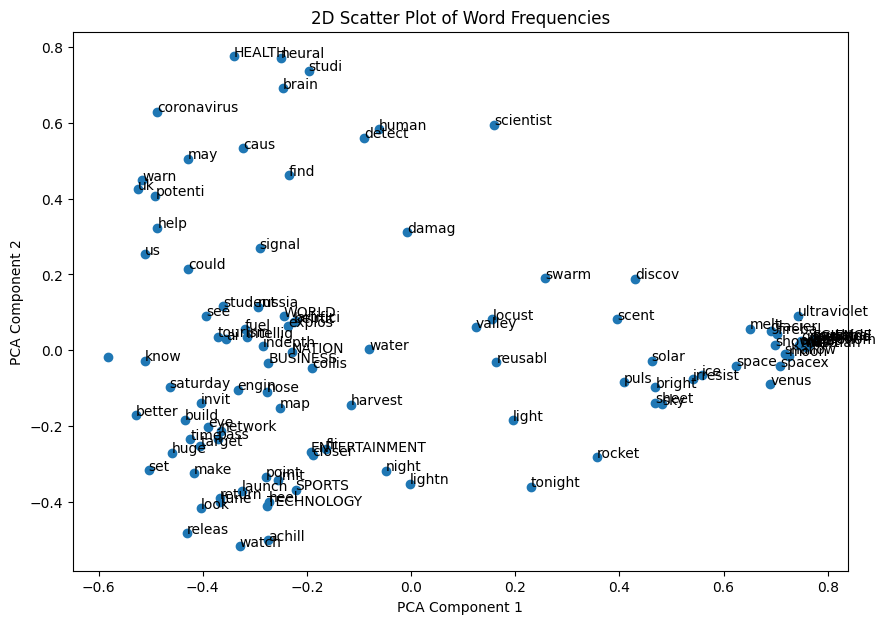

In [82]:
plt.figure(figsize=(10, 7))
plt.scatter(reduced_data[:, 0], reduced_data[:,1])

# Annotate the scatter plot with words
for i, word in enumerate(df0testnorm[0]):
    plt.annotate(word, (reduced_data[i, 0], reduced_data[i, 1]))

plt.title('2D Scatter Plot of Word Frequencies')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

In [187]:
import plotly.express as px
fig = px.scatter(ugh, x="X", y="Y", hover_data="w", color="color", size="totals")
fig.show()

In [191]:
ugh=pd.DataFrame({"w":df0testnorm[0],"X":reduced_data[:, 0],"Y":reduced_data[:,1], "Z":reduced_data[:,2], "color":df0testnorm["color"], "totals":df0testnorm["totals"]})
ugh

w         X         Y         Z  color    totals
0          closer -0.122367  0.340583  0.216827    0.0  4.610436
1            look  0.293782 -0.133287  0.230241    0.0  9.729411
3           solar -0.314421 -0.055348  0.241448    0.0  5.039684
4            fuel -0.510115 -0.061601 -0.023680    0.0  5.582770
5         potenti -0.465551  0.041583 -0.018108    0.0  7.287362
..            ...       ...       ...       ...    ...       ...
3           WORLD -0.185020 -0.023341 -0.247016    0.5  5.000000
4   ENTERTAINMENT  0.693416 -0.498560 -0.054276    0.5  5.000000
5          SPORTS  0.320499  0.852152  0.069755    0.5  5.000000
6        BUSINESS -0.465620 -0.052077  0.257751    0.5  5.000000
7          NATION -0.257954 -0.044502 -0.468286    0.5  5.000000

[7618 rows x 6 columns]

In [192]:
fig = px.scatter_3d(ugh, x="X", y="Y", z="Z",hover_data="w", color="color", size="totals")

# Show the plot
fig.show()